In [69]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os, pickle
import sys
sys.path.append("../")

from general.utils import load_json
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [70]:
# from general.utils import mkdir
# basedir = '/data/natalia/models/lawschool/'
# mkdir(basedir)

## Load BPF

 ###  BPF_512_adam5e6_CE_seed42_split1rho01_epsilon1e2 ### 0.01 0.1


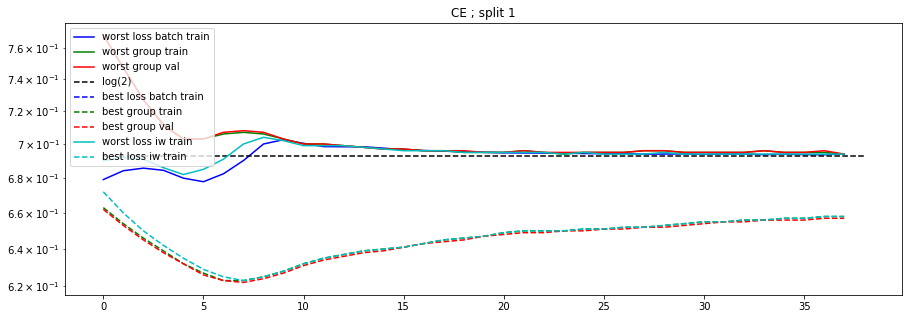

 ###  BPF_512_adam5e6_CE_seed42_split1rho02_epsilon1e2 ### 0.01 0.2


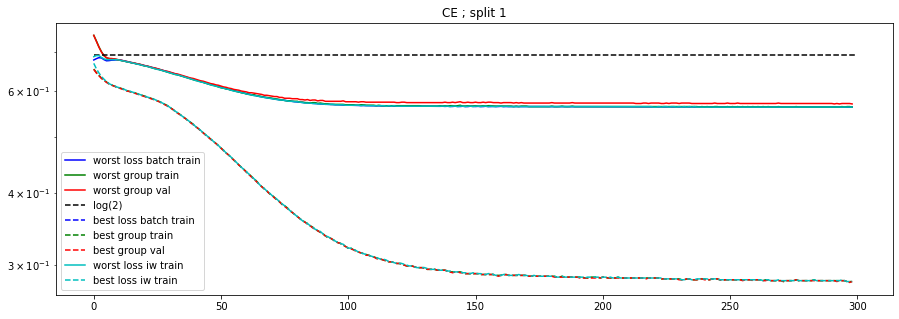

 ###  BPF_512_adam5e6_CE_seed42_split1rho03_epsilon1e2 ### 0.01 0.3


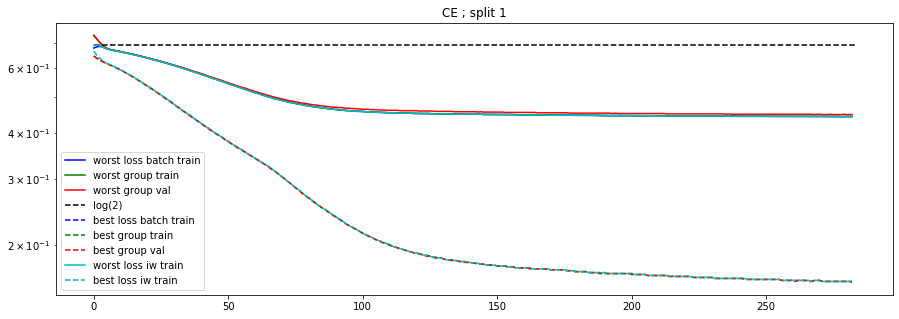

 ###  BPF_512_adam5e6_CE_seed42_split1rho035_epsilon1e2 ### 0.01 0.35


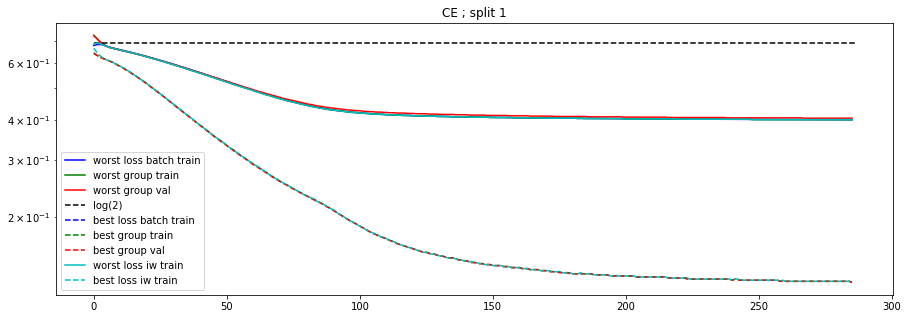

 ###  BPF_512_adam5e6_CE_seed42_split1rho04_epsilon1e2 ### 0.01 0.4


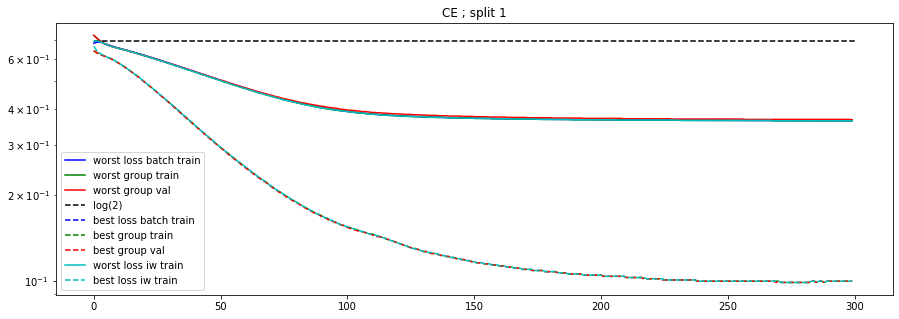

 ###  BPF_512_adam5e6_CE_seed42_split1rho045_epsilon1e2 ### 0.01 0.45


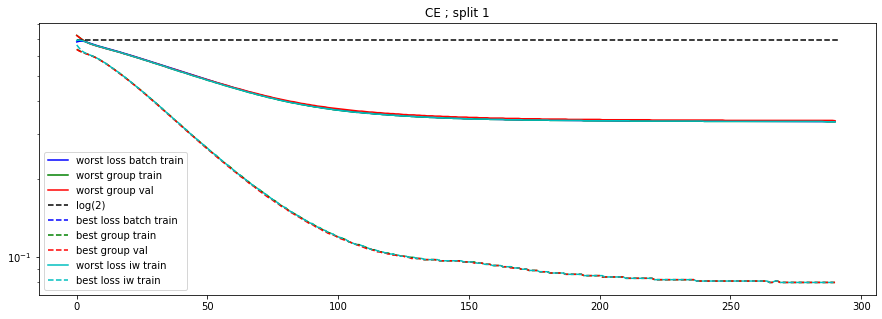

 ###  BPF_512_adam5e6_CE_seed42_split1rho05_epsilon1e2 ### 0.01 0.5


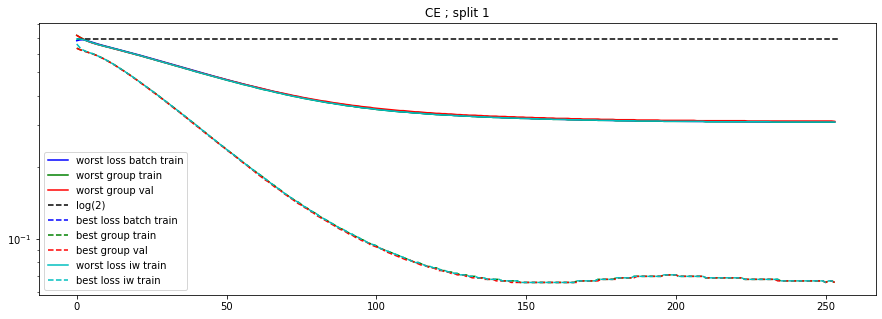

 ###  BPF_512_adam5e6_CE_seed42_split1rho06_epsilon1e2 ### 0.01 0.6


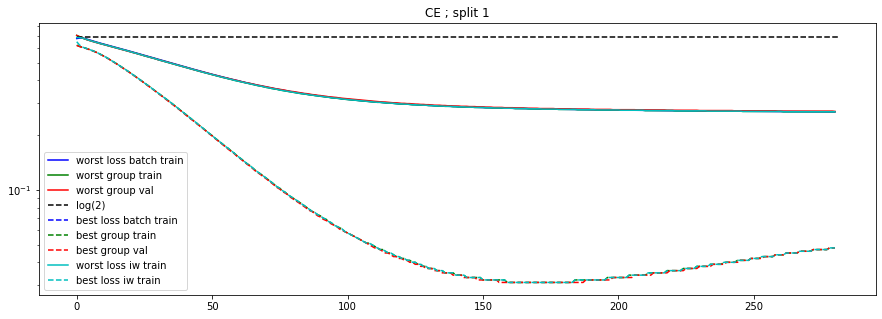

 ###  BPF_512_adam5e6_CE_seed42_split1rho07_epsilon1e2 ### 0.01 0.7


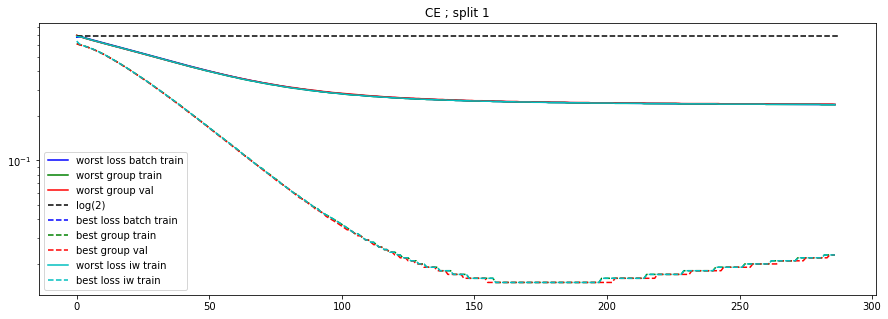

 ###  BPF_512_adam5e6_CE_seed42_split1rho08_epsilon1e2 ### 0.01 0.8


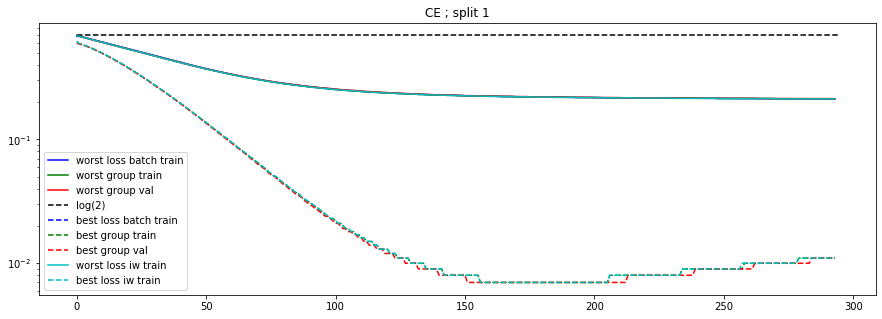

 ###  BPF_512_adam5e6_CE_seed42_split1rho09_epsilon1e2 ### 0.01 0.9


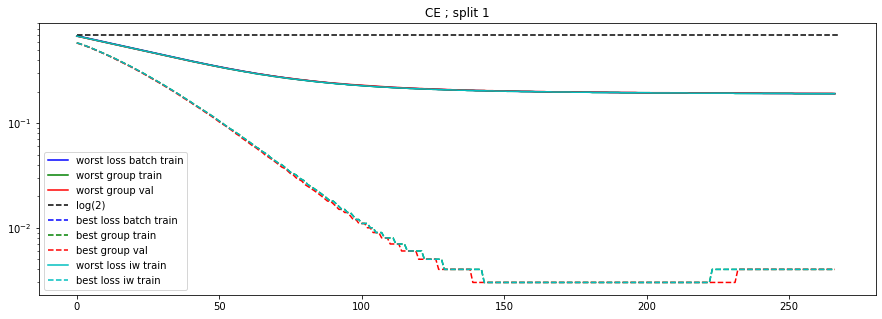

 ###  BPF_512_adam5e6_CE_seed42_split1rho1_epsilon1e2 ### 0.01 1.0


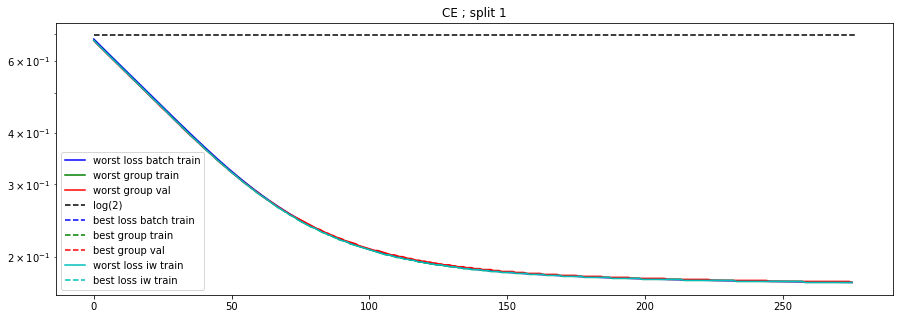

 ###  BPF_512_adam5e6_CE_seed42_split1rho012_epsilon1e2 ### 0.01 0.12


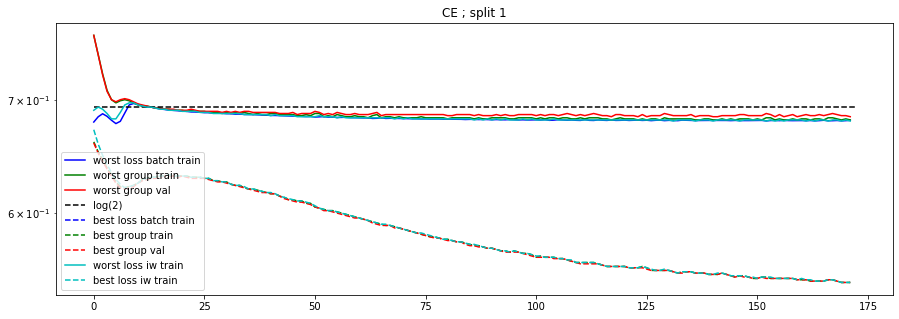

 ###  BPF_512_adam5e6_CE_seed42_split1rho014_epsilon1e2 ### 0.01 0.14


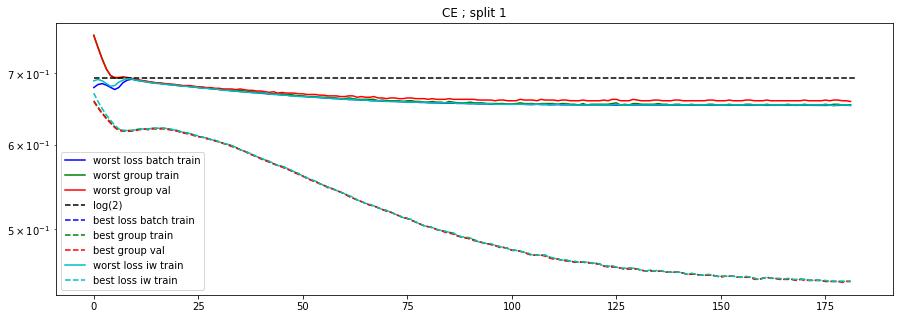

 ###  BPF_512_adam5e6_CE_seed42_split1rho016_epsilon1e2 ### 0.01 0.16


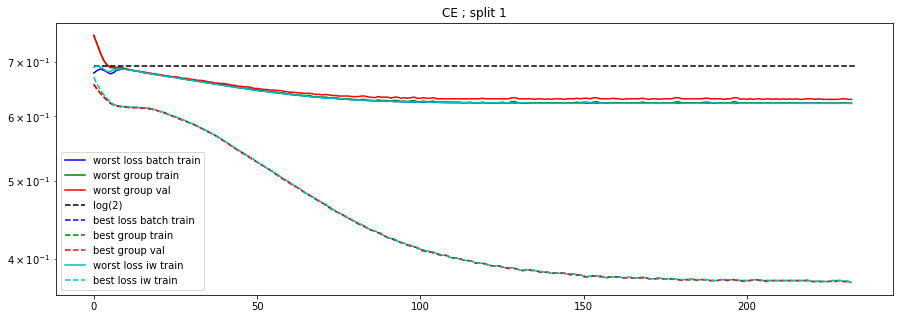

 ###  BPF_512_adam5e6_CE_seed42_split1rho018_epsilon1e2 ### 0.01 0.18


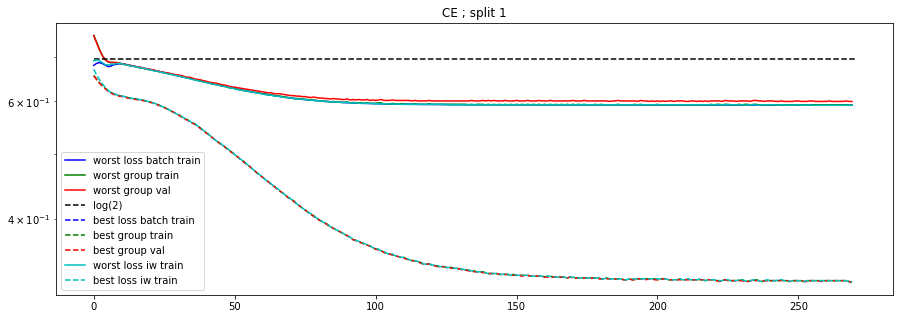

In [76]:
dataset = 'lawschool'
basedir = '/data/natalia/models/'+dataset+'/BPF/'
model_name_prefix = 'BPF_512_adam5e6_'

seed = 42
loss = 'CE'


rho_dic={'01':1e-1}
rho_dic = {'01':1e-1, '02': 2e-1, '03': 3e-1,'035':0.35, '04': 4e-1, '045':0.45,'05': 5e-1,
           '06':6e-1 ,'07':7e-1,'08':8e-1, '09':9e-1 , '1':1,
           '012':1.2e-1,'014':1.4e-1,'016':1.6e-1,'018':1.8e-1}

epsilon_dic={'1e2':1e-2}
# epsilon_dic={'1e2':1e-2,'1e3':1e-3,'1e4':1e-4}
split_list = [1]
# split_list = [1,2,3,4,5]
nofiles_list = []

pd_summary = None
for rho_str in rho_dic.keys():
    for epsilon_str in epsilon_dic.keys():
        plt.figure(figsize=(15,5))
        for split in split_list:
            model_name = model_name_prefix + loss + '_seed' + str(seed) + '_split' + \
                                     str(split) + 'rho' + rho_str + '_epsilon' + epsilon_str
            
            if os.path.exists(basedir+model_name+'/pd_summary_results.csv'):
                config = load_json(basedir+model_name+'/config.json')
                history = load_json(basedir+model_name+'/history.json')
                pd_summary_ix = pd.read_csv(basedir+model_name+'/pd_summary_results.csv')
                if pd_summary is None:
                    pd_summary = pd_summary_ix.copy()
                else:
                    pd_summary = pd.concat([pd_summary,pd_summary_ix],axis = 0)

                print(' ### ',model_name, '###', config['epsilon'], config['rho'])

                plt.subplot(1,len(split_list),split)
                plt.title(loss + ' ; split ' + str(split))
                plt.semilogy(history['loss_a1_mbatch_train'][0:history['best_game']+1],'b',label = 'worst loss batch train')
                plt.semilogy(history['loss_a1_train'][0:history['best_game']+1],'g',label = 'worst group train')
                plt.semilogy(history['loss_a1_val'][0:history['best_game']+1],'r',label = 'worst group val')

                plt.semilogy([0,history['best_game']+1],[np.log(2),np.log(2)],'k--',label = 'log(2)')

                plt.semilogy(history['loss_a0_mbatch_train'][0:history['best_game']+1],'b--',label = 'best loss batch train')
                plt.semilogy(history['loss_a0_train'][0:history['best_game']+1],'g--',label = 'best group train')
                plt.semilogy(history['loss_a0_val'][0:history['best_game']+1],'r--',label = 'best group val')

                plt.semilogy(history['loss_iw_a1_train'][0:history['best_game']+1],'c',label = 'worst loss iw train')
                plt.semilogy(history['loss_iw_a0_train'][0:history['best_game']+1],'c--',label = 'best loss iw train')

                plt.legend()
            else:
                nofiles_list.append(model_name)
        plt.show()
        
if len(nofiles_list)>0:
    print('### ')
    print('Not found files : !!!!!!! ')
    for file in nofiles_list:
        print(file)

In [ ]:
metric = 'ce'

from matplotlib import cm
cm_function = cm.bwr
cm_function = cm.viridis
param_tag = 'rho_model'

for dataset in ['train','val','test']:
    pd_aux = pd_summary.loc[(pd_summary.dataset == dataset) & (pd_summary.metric == metric)]
    
    if metric == 'softerr':
        value_random = 0.5
    else:
        value_random = np.log(2)
    
    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    plt.title('Worst Group; '+dataset)
    import seaborn as sns
    sns.lineplot(data=pd_aux,x='rho_eval',y='worst',
                 hue ='rho_model',palette=cm_function,legend='full',style ='epsilon_model')
        
    plt.plot([pd_aux.rho_eval.min(),pd_aux.rho_eval.max()],
             [value_random,value_random],'k--',label = 'random')
    plt.legend()
    
    plt.subplot(1,3,2)
    plt.title('Best Group; '+dataset)
    sns.lineplot(data=pd_aux,x='rho_eval',y='best',
                 hue ='rho_model',palette=cm_function,legend='full',style ='epsilon_model')

    plt.plot([pd_aux.rho_eval.min(),pd_aux.rho_eval.max()],
             [value_random,value_random],'k--',label = 'random')
    plt.legend()
    
    plt.subplot(1,3,3)
    plt.title('Average; '+dataset)
    sns.lineplot(data=pd_aux,x='rho_eval',y='avg',
                 hue ='rho_model',palette=cm_function,legend='full',style ='epsilon_model')

    plt.plot([pd_aux.rho_eval.min(),pd_aux.rho_eval.max()],
             [value_random,value_random],'k--',label = 'random')
    plt.legend()
    plt.show()


In [74]:
from general.evaluation import get_best_model
pd_out = get_best_model(pd_summary, model_tag='rho_model', dataset_choice=['train', 'val'], precision=3)

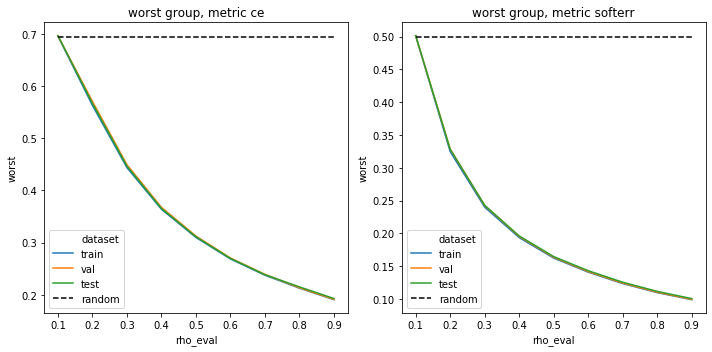

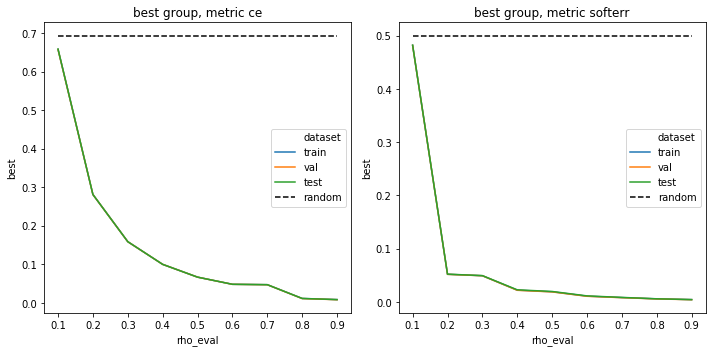

In [75]:
for group in ['worst','best']:
    plt.figure(figsize=(10,5))
    ix = 1
    for metric in ['ce','softerr']:

        if (metric == 'softerr') | (metric == 'err'):
            value_random = 0.5
        else:
            value_random = np.log(2)

        plt.subplot(1,2,ix)
        ix += 1

        pd_aux = pd_out.loc[(pd_out.metric == metric)]
        plt.title(group + ' group, metric '+metric)
        sns.lineplot(data = pd_aux, x = 'rho_eval',y=group,hue='dataset')
        plt.plot([pd_aux.rho_eval.min(),pd_aux.rho_eval.max()],
                 [value_random,value_random],'k--',label = 'random')
        plt.legend()
#         plt.yscale('log')
    plt.tight_layout()
    plt.show()
print()
print()
